In [1]:
%load_ext autoreload
%autoreload 2

%matplotlib inline
%reload_ext autoreload

import os
import pandas as pd
import torch
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
import repackage
repackage.up()

from modelo_perceptron import *
from utils import *
from fluxdataset import *

In [2]:
epochs = 100
learning_rate = 0.001
alpha = 0.5
beta = 0.5
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [3]:
PATH = "../datos/"
TRAIN_FILE = "exoTrain.csv"

In [4]:
df_train = pd.read_csv(f'{PATH}{TRAIN_FILE}', low_memory=False)
df_train['LABEL'] = df_train['LABEL'].add(-1)
df_train.iloc[:,1:] = reduce_upper_outliers(df_train.iloc[:,1:])
df_train.iloc[:,1:] = df_train.iloc[:,1:].apply(gaussian_filter, substract = True, axis = 1)
df_train.iloc[:,1:] = df_train.iloc[:,1:].apply(z_score_normalizing, axis = 1)

In [5]:
df_train_x, df_train_y = generate_x_y_df(df_train)

In [6]:
# Usamos SMOTE para generar casos positivos y equilibrar el dataset
sm = SMOTE()
df_train_x, df_train_y = sm.fit_sample(df_train_x, df_train_y)

In [7]:
df_train = pd.DataFrame(df_train_x)
df_train.insert(0, 'LABEL', df_train_y)
df_train['LABEL'].value_counts()

1    5050
0    5050
Name: LABEL, dtype: int64

Vamos a ver alguno de los datos generados

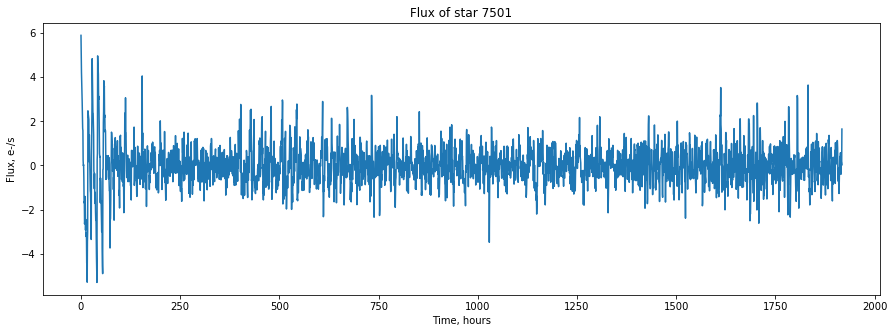

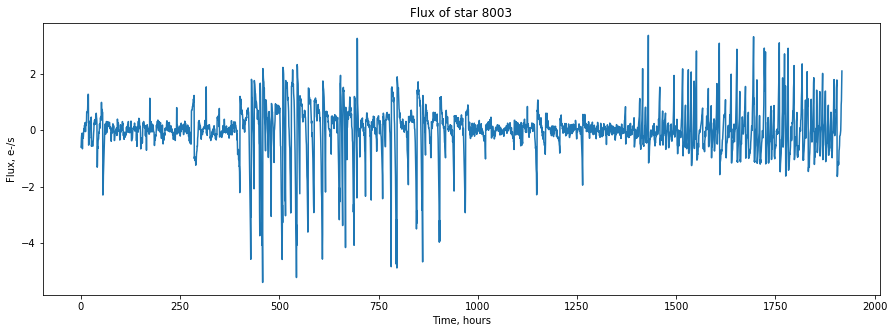

In [8]:
show_flux_plot(df_train.drop('LABEL', axis = 1), [7500])
show_flux_plot(df_train.drop('LABEL', axis = 1), [8002])

In [9]:
validation_proportion = 0.2
df_train, df_validation = split_train_df(df_train, validation_proportion)

In [10]:
modelo = Perceptron().to(device)
model_name = os.getcwd() + "\\saved_models\\perceptron_smote_sgd_cross_diferencia"
criterion = torch.nn.CrossEntropyLoss().to(device)
optimizer = torch.optim.SGD(modelo.parameters(), lr = learning_rate)

In [11]:
resultado = train_cross(modelo, model_name, criterion, optimizer, epochs, alpha, beta, df_train, df_validation, device)

using device cuda
Matriz de confusión:
			Predicciones
Valor real	Negativos	Positivos
Negativos	1010		0
Positivos	672		338

Acierto: 0.6673267483711243 Sensibilidad: 0.33465346693992615 Especificidad: 1.0 Score: 0.44532498717308044
New model saved
Score 0.44532498717308044 at epoch 0
Epoch: 0 Train loss 0.6790898922867704 Validation loss 0.6603397130966187
Matriz de confusión:
			Predicciones
Valor real	Negativos	Positivos
Negativos	998		12
Positivos	287		723

Acierto: 0.8519802093505859 Sensibilidad: 0.7158415913581848 Especificidad: 0.9881188273429871 Score: 0.7258702516555786
New model saved
Score 0.7258702516555786 at epoch 1
Epoch: 1 Train loss 0.5746310244544898 Validation loss 0.41113460063934326
Matriz de confusión:
			Predicciones
Valor real	Negativos	Positivos
Negativos	1003		7
Positivos	105		905

Acierto: 0.9445545077323914 Sensibilidad: 0.896039605140686 Especificidad: 0.9930692911148071 Score: 0.8921831846237183
New model saved
Score 0.8921831846237183 at epoch 2
Epoch: 2 

Score 0.9950556755065918 at epoch 53
Epoch: 53 Train loss 0.0006778589717232354 Validation loss 0.06702437996864319
Score 0.9950556755065918 at epoch 54
Epoch: 54 Train loss 0.0009172434116354083 Validation loss 0.06674976646900177
Score 0.9950556755065918 at epoch 55
Epoch: 55 Train loss 0.0008250586024605402 Validation loss 0.0692959874868393
Score 0.9940682053565979 at epoch 56
Epoch: 56 Train loss 0.0008437714216732743 Validation loss 0.06902352720499039
Score 0.9950556755065918 at epoch 57
Epoch: 57 Train loss 0.0008126026701809156 Validation loss 0.06761562079191208
Score 0.9950556755065918 at epoch 58
Epoch: 58 Train loss 0.0006484052406089141 Validation loss 0.0684346929192543
Score 0.9950556755065918 at epoch 59
Epoch: 59 Train loss 0.0007341989417477409 Validation loss 0.06687203794717789
Score 0.9950556755065918 at epoch 60
Epoch: 60 Train loss 0.0006841360637457064 Validation loss 0.06675644218921661
Score 0.9950556755065918 at epoch 61
Epoch: 61 Train loss 0.00071911401677

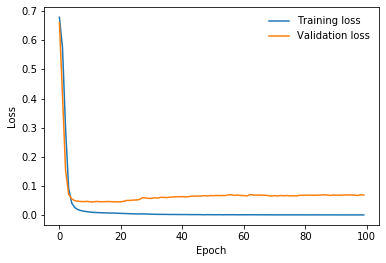

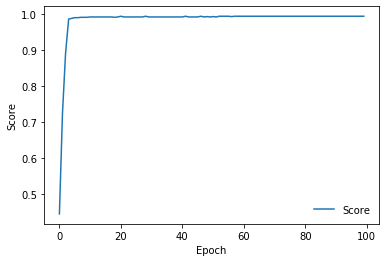

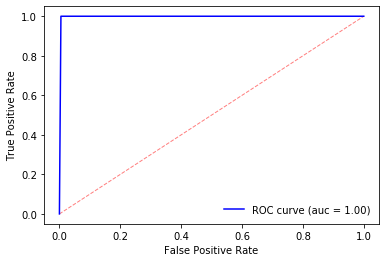

In [12]:
resultado.plot_graphics()

In [13]:
df_train = pd.read_csv(f'{PATH}{TRAIN_FILE}', low_memory=False)
df_train['LABEL'] = df_train['LABEL'].add(-1)
df_train.iloc[:, 1:] = reduce_upper_outliers(df_train.iloc[:, 1:], 0.01)
df_train.iloc[:, 1:] = gaussian_filter(df_train.iloc[:, 1:], False)
df_train.iloc[:, 1:] = z_score_normalizing(df_train.iloc[:, 1:])
df_train_x, df_train_y = generate_x_y_df(df_train)
sm = SMOTE()
df_train_x, df_train_y = sm.fit_sample(df_train_x, df_train_y)
df_train = pd.DataFrame(df_train_x)
df_train.insert(0, 'LABEL', df_train_y)
validation_proportion = 0.2
df_train, df_validation = split_train_df(df_train, validation_proportion)
modelo = Perceptron().to(device)
model_name = os.getcwd() + "\\saved_models\\perceptron_smote_sgd_cross_solo_filtro"
criterion = torch.nn.CrossEntropyLoss().to(device)
optimizer = torch.optim.SGD(modelo.parameters(), lr = learning_rate)

In [14]:
resultado = train_cross(modelo, model_name, criterion, optimizer, epochs, alpha, beta, df_train, df_validation, device)

using device cuda
Matriz de confusión:
			Predicciones
Valor real	Negativos	Positivos
Negativos	1004		6
Positivos	0		1010

Acierto: 0.997029721736908 Sensibilidad: 1.0 Especificidad: 0.9940593838691711 Score: 0.9940682053565979
New model saved
Score 0.9940682053565979 at epoch 0
Epoch: 0 Train loss 0.2683074922144118 Validation loss 0.04496137797832489
Matriz de confusión:
			Predicciones
Valor real	Negativos	Positivos
Negativos	1006		4
Positivos	0		1010

Acierto: 0.998019814491272 Sensibilidad: 1.0 Especificidad: 0.996039628982544 Score: 0.9960435628890991
New model saved
Score 0.9960435628890991 at epoch 1
Epoch: 1 Train loss 0.022216240726042502 Validation loss 0.01706649735569954
Score 0.9960435628890991 at epoch 2
Epoch: 2 Train loss 0.011364724660421361 Validation loss 0.012173456139862537
Matriz de confusión:
			Predicciones
Valor real	Negativos	Positivos
Negativos	1007		3
Positivos	0		1010

Acierto: 0.9985148906707764 Sensibilidad: 1.0 Especificidad: 0.997029721736908 Score: 0.

Score 1.0 at epoch 66
Epoch: 66 Train loss 0.0004950467755298803 Validation loss 5.580576180364005e-05
Score 1.0 at epoch 67
Epoch: 67 Train loss 0.0008139752515471807 Validation loss 0.00011067709419876337
Score 1.0 at epoch 68
Epoch: 68 Train loss 0.0006251885011644647 Validation loss 6.13796801189892e-05
Score 1.0 at epoch 69
Epoch: 69 Train loss 0.00044901759022533303 Validation loss 5.500422776094638e-05
Score 1.0 at epoch 70
Epoch: 70 Train loss 0.0004576694404724801 Validation loss 6.0724385548383e-05
Score 1.0 at epoch 71
Epoch: 71 Train loss 0.0004564303499047119 Validation loss 5.380222137318924e-05
Score 1.0 at epoch 72
Epoch: 72 Train loss 0.00042879332852835704 Validation loss 7.923570228740573e-05
Score 1.0 at epoch 73
Epoch: 73 Train loss 0.00031662254345298993 Validation loss 4.713983798865229e-05
Score 1.0 at epoch 74
Epoch: 74 Train loss 0.00047072449533065947 Validation loss 5.3502426453633234e-05
Score 1.0 at epoch 75
Epoch: 75 Train loss 0.000383689276652761 Valida

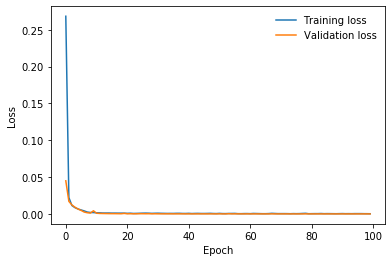

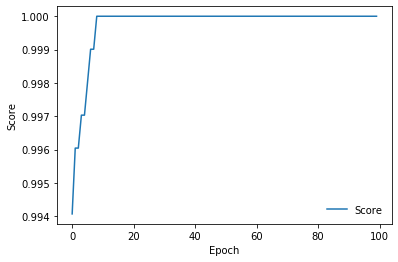

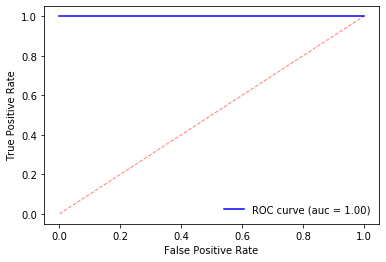

In [15]:
resultado.plot_graphics()

In [16]:
df_train = pd.read_csv(f'{PATH}{TRAIN_FILE}', low_memory=False)
df_train['LABEL'] = df_train['LABEL'].add(-1)
df_train.iloc[:, 1:] = reduce_upper_outliers(df_train.iloc[:, 1:], 0.01)
df_train.iloc[:, 1:] = gaussian_filter(df_train.iloc[:, 1:], True)
df_train.iloc[:, 1:] = z_score_normalizing(df_train.iloc[:, 1:])
df_train_x, df_train_y = generate_x_y_df(df_train)
sm = SMOTE()
df_train_x, df_train_y = sm.fit_sample(df_train_x, df_train_y)
df_train = pd.DataFrame(df_train_x)
df_train.insert(0, 'LABEL', df_train_y)
validation_proportion = 0.2
df_train, df_validation = split_train_df(df_train, validation_proportion)
modelo = Perceptron().to(device)
model_name = os.getcwd() + "\\saved_models\\perceptron_smote_adam_cross_diferencia"
criterion = torch.nn.CrossEntropyLoss().to(device)
optimizer = torch.optim.Adam(modelo.parameters(), lr = learning_rate)

In [17]:
resultado = train_cross(modelo, model_name, criterion, optimizer, epochs, alpha, beta, df_train, df_validation, device)

using device cuda
Matriz de confusión:
			Predicciones
Valor real	Negativos	Positivos
Negativos	971		39
Positivos	0		1010

Acierto: 0.9806931018829346 Sensibilidad: 1.0 Especificidad: 0.9613861441612244 Score: 0.9617589712142944
New model saved
Score 0.9617589712142944 at epoch 0
Epoch: 0 Train loss 0.6137132185354534 Validation loss 0.1803753823041916
Matriz de confusión:
			Predicciones
Valor real	Negativos	Positivos
Negativos	997		13
Positivos	0		1010

Acierto: 0.9935643672943115 Sensibilidad: 1.0 Especificidad: 0.987128734588623 Score: 0.9871701598167419
New model saved
Score 0.9871701598167419 at epoch 1
Epoch: 1 Train loss 0.029062125482365933 Validation loss 0.09059663116931915
Matriz de confusión:
			Predicciones
Valor real	Negativos	Positivos
Negativos	1002		8
Positivos	0		1010

Acierto: 0.996039628982544 Sensibilidad: 1.0 Especificidad: 0.9920791983604431 Score: 0.9920949339866638
New model saved
Score 0.9920949339866638 at epoch 2
Epoch: 2 Train loss 0.06024650685526062 Vali

Score 0.9920949339866638 at epoch 64
Epoch: 64 Train loss 0.003320430292941556 Validation loss 0.03425390273332596
Score 0.9920949339866638 at epoch 65
Epoch: 65 Train loss 0.0033483854024717124 Validation loss 0.03459526225924492
Score 0.9920949339866638 at epoch 66
Epoch: 66 Train loss 0.0033134592051553254 Validation loss 0.03424282744526863
Score 0.9920949339866638 at epoch 67
Epoch: 67 Train loss 0.0032932164055286066 Validation loss 0.03394556790590286
Score 0.9920949339866638 at epoch 68
Epoch: 68 Train loss 0.0032892789581034443 Validation loss 0.033867426216602325
Score 0.9920949339866638 at epoch 69
Epoch: 69 Train loss 0.0032564064653793183 Validation loss 0.033769793808460236
Score 0.9920949339866638 at epoch 70
Epoch: 70 Train loss 0.0033841753950213443 Validation loss 0.03509487956762314
Score 0.9920949339866638 at epoch 71
Epoch: 71 Train loss 0.0033626171621945825 Validation loss 0.034871309995651245
Score 0.9920949339866638 at epoch 72
Epoch: 72 Train loss 0.0033307273

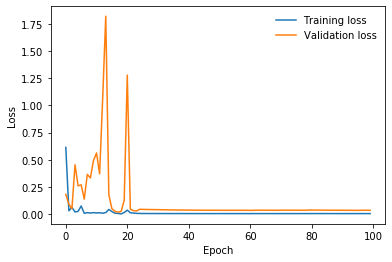

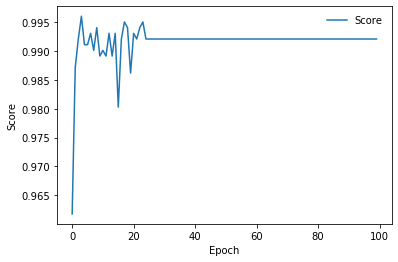

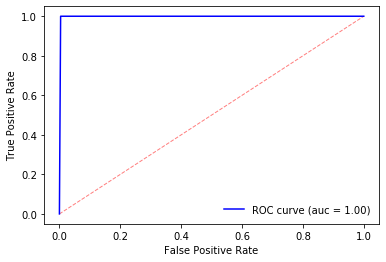

In [18]:
resultado.plot_graphics()

In [23]:
df_train = pd.read_csv(f'{PATH}{TRAIN_FILE}', low_memory=False)
df_train['LABEL'] = df_train['LABEL'].add(-1)
df_train.iloc[:, 1:] = reduce_upper_outliers(df_train.iloc[:, 1:], 0.01)
df_train.iloc[:, 1:] = gaussian_filter(df_train.iloc[:, 1:], False)
df_train.iloc[:, 1:] = z_score_normalizing(df_train.iloc[:, 1:])
df_train_x, df_train_y = generate_x_y_df(df_train)
sm = SMOTE()
df_train_x, df_train_y = sm.fit_sample(df_train_x, df_train_y)
df_train = pd.DataFrame(df_train_x)
df_train.insert(0, 'LABEL', df_train_y)
validation_proportion = 0.2
df_train, df_validation = split_train_df(df_train, validation_proportion)
modelo = Perceptron().to(device)
model_name = os.getcwd() + "\\saved_models\\perceptron_smote_adam_cross_solo_filtro"
criterion = torch.nn.CrossEntropyLoss().to(device)
optimizer = torch.optim.Adam(modelo.parameters(), lr = learning_rate)

In [24]:
resultado = train_cross(modelo, model_name, criterion, optimizer, epochs, alpha, beta, df_train, df_validation, device)

using device cuda
Matriz de confusión:
			Predicciones
Valor real	Negativos	Positivos
Negativos	1009		1
Positivos	0		1010

Acierto: 0.9995049834251404 Sensibilidad: 1.0 Especificidad: 0.999009907245636 Score: 0.9990101456642151
New model saved
Score 0.9990101456642151 at epoch 0
Epoch: 0 Train loss 0.05398193155184831 Validation loss 0.0026033599860966206
Score 0.9990101456642151 at epoch 1
Epoch: 1 Train loss 0.016115104458709756 Validation loss 0.0067025404423475266
Score 0.9990101456642151 at epoch 2
Epoch: 2 Train loss 0.013639353735759707 Validation loss 0.0031115873716771603
Matriz de confusión:
			Predicciones
Valor real	Negativos	Positivos
Negativos	1010		0
Positivos	0		1010

Acierto: 1.0 Sensibilidad: 1.0 Especificidad: 1.0 Score: 1.0
New model saved
Score 1.0 at epoch 3
Epoch: 3 Train loss 0.005529084912326076 Validation loss 0.00032543070847168565
Score 0.9990101456642151 at epoch 4
Epoch: 4 Train loss 0.00432975305484073 Validation loss 0.000349052541423589
Score 0.99901014

Score 1.0 at epoch 95
Epoch: 95 Train loss 0.0 Validation loss 0.0
Score 1.0 at epoch 96
Epoch: 96 Train loss 0.0 Validation loss 0.0
Score 1.0 at epoch 97
Epoch: 97 Train loss 0.0 Validation loss 0.0
Score 1.0 at epoch 98
Epoch: 98 Train loss 0.0 Validation loss 0.0
Score 1.0 at epoch 99
Epoch: 99 Train loss 0.0 Validation loss 0.0
Best score 1.0
execution time 8358.347474399983


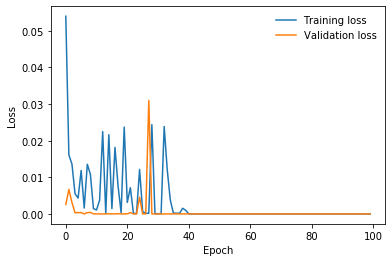

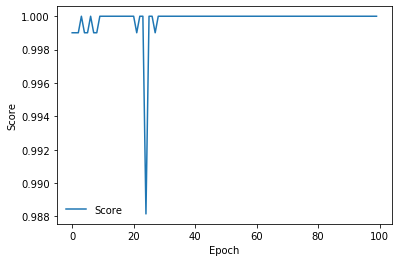

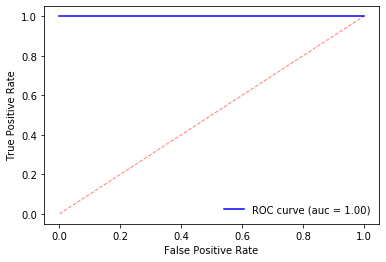

In [25]:
resultado.plot_graphics()